This code will create a file with all the linear regression output
The output files can then be use to create a qqplot based on genomewide data vs by chr
Just change the Tissue path to obtain the results

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
def mergeallchrs(tissue):
    Frames=[pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+ tissue+'/chr1/Lin_Reg_Out',sep='\t')]
    chrs=[x for x in range(2,23)]+['X', 'Y']
    for x in chrs:
        LN='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+ tissue+'/chr'+str(x)+'/Lin_Reg_Out'
        frame1=pd.read_csv(LN, sep='\t')
        Frames.append(frame1)
    #print('Chr',x,'    ',frame1.shape)
    Results=pd.concat(Frames)
    print('\n All Chrms ','   ', Results.shape)
    Results.to_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+ tissue+'/Lin_Reg_Out', sep='\t', header=True)
    print('Continuing...')

    Frames=[pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+ tissue+'/chr1/Lin_Reg_Out_perm',sep='\t')]
    for x in chrs:
        LN='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+ tissue+'/chr'+str(x)+'/Lin_Reg_Out_perm'
        frame1=pd.read_csv(LN, sep='\t')
        Frames.append(frame1)

    Results=pd.concat(Frames)
    print('\n All Chrms ','   ', Results.shape)
    Results.to_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+ tissue+'/Lin_Reg_Out_perm', sep='\t', header=True)

    print('THE END')

    
    
#tissu = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Adipose-Subcutaneous','Artery-Tibial','Esophagus-Mucosa']

tissu = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal']    
for T in tissu:
    print (T)
    mergeallchrs(T+'/SNP_Analysis')
########################After this, run script PostlinregfilterHomHet

WholeBlood

 All Chrms      (9650652, 12)
Continuing...

 All Chrms      (9650652, 12)
THE END
Cells-Transformedfibroblasts

 All Chrms      (9956557, 12)
Continuing...

 All Chrms      (9956557, 12)
THE END
Muscle-Skeletal

 All Chrms      (9949250, 12)
Continuing...

 All Chrms      (9949250, 12)
THE END


In [ ]:
##Looking at SNPs that overlap with GTEx eqtl results

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss
LR=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Cells-Transformedfibroblasts/SNP_Analysis/chr1/Lin_Reg_Out", '\t',low_memory=False)
LRgtx=pd.read_csv("/home/szfeupe/scratch/Whole_Blood_Analysis_gtex.signif_snpgene_pairs.txt", sep='\t')
LRgtx['start']=[x.split('_')[1] for x in LRgtx['variant_id']]
LRgtx['chrom']=['ch'+ x.split('_')[0] for x in LRgtx['variant_id']]
LRx0=LR.loc[LR['chrom']=='chr1']
LRx1=LRgtx.loc[LRgtx['chrom']=='ch1']

In [1]:
import pandas as pd

featurename='CDS'

#This code prepares files for eSTRs - feature analysis by Making genecode table with features
HCOL=['gene','chrom','gene.name','feature.type','start','stop','G.strand','gene.type','database','score','genomic.phase']

annot = pd.read_csv('/storage/szfeupe/data/gencode.v19.annotation.gtf.gz', sep='\t', skiprows=5, header=None)
IDs= annot[8].str[1:-1].str.split('"', expand=True)
del annot[8]
annot.columns=['chrom','database','feature.type','start','stop','score','G.strand','genomic.phase']
annot['gene']=IDs[1]
annot['gene.name']=IDs[9]
annot['gene.type']=IDs[5]

genecode_table = annot[HCOL]

feat=annot.loc[annot['feature.type']=='CDS']                ##CDS
#feat=annot.loc[annot['feature.type']=='gene']               ##Gene
#feat = annot.loc[annot['feature.type']=='transcript']       ##Transcript
#feat=annot.loc[annot['feature.type']=='exon']               ##Exon

#Save to file
feat.to_csv('/storage/szfeupe/Runs/GTEx_estr/FEATURES/'+featurename+'_table.tsv', sep='\t',index=False)



In [ ]:
#This code evaluates the number of eSTRs and eGenes across all tissues 
#using FDR correction output from the Linear regression. The comments printed will help if needed

import matplotlib.pyplot as plt
import pandas as pd
eGenes=[]
eSTRs=[]
print ('No tissue yet')
tissues=['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Artery-Tibial','Adipose-Subcutaneous', 'Esophagus-Mucosa']
for tissu in tissues:
    print(tissu)
    File='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+tissu+'/PQValues.txt'   #'PQValues.txt'
    File1=pd.read_csv(File, sep='\t')
    egen=File1.loc[File1['significant']==1]
    print(egen.shape)
    Nowgene=list(egen['gene'])
    Nowpos=list(egen['str.id'])
    print('All new egenes from previous set ... ', len([x for x in Nowgene if x not in eGenes]))
    print('All new estrs from previous set ... ', len([x for x in Nowpos if x not in eSTRs]))
    eGenes=eGenes+Nowgene
    eSTRs=eSTRs+Nowpos
    
    print (len(eGenes), ' So far')
    print (len(eSTRs), ' *******')

print('Total # of egenes ',len(set(eGenes)))
print('Total # of eSTRs ',len(set(eSTRs)))
    
print (len([x for x in set(eGenes) if eGenes.count(x)>=5]))
print (len([x for x in set(eGenes) if eGenes.count(x)>=2]))
print (len([x for x in set(eSTRs) if eSTRs.count(x)>=5]))
print (len([x for x in set(eSTRs) if eSTRs.count(x)>=2]))

print (' ... The end!')

In [5]:
##This code summarises the Anova results 
##
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

Tissue="WholeBlood"
##delta_bic = snp_bic - snpstr_bic        ##delta_aic = snp_aic - snpstr_aic 
##              the lower tht aic or bic the closer the data is to the model
print('Summary for '+Tissue+' ...\n')

#q and p values
pval = pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"+Tissue+"/PQValue.tsv", sep='\t')
pval = pval.loc[pval['qvalue']<=0.05]
#Anova output explored
hh = pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"+Tissue+"/HH/anova_wg.csv", sep=',')
print(hh.shape[0] , ' Total number of tests...\n')
hh['delta_aic']=hh['delta_aic']
print(hh.loc[hh['delta_aic']>=0].shape[0],' Anova tests chose SNPSTR over SNP only based on AIC' )
print(hh.loc[hh['delta_bic']>=0].shape[0],' Anova tests chose SNPSTR over SNP only based on BIC')

goodAic=hh.loc[hh['delta_aic']>=0]
goodAicBic = goodAic.loc[goodAic['delta_bic']>=0]
print ('\nBoth AIC and BIC select the SNP+STR model for ', goodAicBic.shape[0], 'genes out of ', hh.shape[0])
print('ie ',100*goodAicBic.shape[0]/hh.shape[0], '% significant tests genomewide\n')

Sel_pval = goodAicBic.loc[goodAicBic['anova_pval']<=0.05]
print('Based on anova pvalues, ', Sel_pval.shape[0] ,'of tests showed to be significant') 

snp_leads = goodAicBic.loc[goodAicBic['esnp_fdr']<=0.1]
str_leads = goodAicBic.loc[goodAicBic['estr_fdr']<=0.1]

print('\n\nOut of those tests favored by AIC and BIC, ', snp_leads.shape[0],' SNPs are significant at 5% FDR')
print('Out of those tests favored by AIC and BIC, ', str_leads.shape[0],' STRs are significant at 5% FDR')

Leads = str_leads.loc[str_leads['esnp_fdr']<=0.1]
#print(hh.loc[hh['delta_bic']>=10].shape)
#hh.loc[hh['delta_aic']>=10].shape
#hh.loc[hh['delta_aic']>=10]
print (Leads.shape[0],' have both significant STR and SNP at 5% FDR\n\n')

##################################Tie all to qvalues of strs
Sel_pval = Sel_pval.loc[Sel_pval['str.start'].isin(list(pval['str.start']))]

Sel_pval=Sel_pval.sort_values(by=["chrom","str.start"], ascending=[True, True])

Sel_pval.loc[:,['gene', 'chrom', 'str.start','anova_pval', 'delta_bic', 'delta_aic']] 
#Sel_pval.shape

Summary for WholeBlood ...

499  Total number of tests...

368  Anova tests chose SNPSTR over SNP only based on AIC
148  Anova tests chose SNPSTR over SNP only based on BIC

Both AIC and BIC select the SNP+STR model for  148 genes out of  499
ie  29.65931863727455 % significant tests genomewide

Based on anova pvalues,  147 of tests showed to be significant


Out of those tests favored by AIC and BIC,  3  SNPs are significant at 5% FDR
Out of those tests favored by AIC and BIC,  17  STRs are significant at 5% FDR
3  have both significant STR and SNP at 5% FDR




,gene,chrom,str.start,anova_pval,delta_bic,delta_aic
119,ENSG00000188199.6,chr10,81440140,4.742294e-05,12.126664,15.001861
209,ENSG00000134882.11,chr13,99933083,5.818104e-05,12.173046,14.758013
219,ENSG00000100883.7,chr14,35450381,2.696465e-02,0.196483,3.032765
260,ENSG00000134489.6,chr18,22040304,2.401760e-09,31.599376,34.533849
472,ENSG00000233927.4,chr19,8393272,6.323747e-06,16.197642,18.993433
425,ENSG00000127507.13,chr19,14885799,4.403628e-04,7.795664,10.686013
406,ENSG00000053501.8,chr19,17304982,7.869589e-06,15.560602,18.487856
34,ENSG00000132305.16,chr2,86380428,2.381132e-03,4.607629,7.482826
479,ENSG00000160209.14,chr21,45196326,1.588149e-02,1.048322,3.968303
491,ENSG00000189306.6,chr22,42947833,2.426120e-06,17.873823,20.801077


In [1]:
import pandas as pd
import numpy as np
Tissue="Cells-Transformedfibroblasts"
#Find lead snp for chosen use case to plot
#Genes = list(Sel_pval['gene'])
Genes=['ENSG00000181754.6', 'ENSG00000152760.5','ENSG00000242485.1']
SNP = pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"+Tissue+"/SNP_Analysis/PQValues.txt", sep='\t')
SNP = SNP.loc[SNP['gene'].isin(Genes)]
SNP = SNP.sort_values(by=["chrom", "str.start"], ascending=[True, True])
print (SNP.loc[:,['gene','chrom','str.start','p.wald','qvalue','beta']])

                    gene chrom    str.start        p.wald    qvalue      beta
15041  ENSG00000242485.1  chr1    1319123.0  7.547211e-07  0.007495  0.422404
8266   ENSG00000152760.5  chr1   67212069.0  2.765367e-07  0.003960  0.437157
12420  ENSG00000181754.6  chr1  110052139.0  2.417477e-17  0.002325  0.661858


In [ ]:
##Checking examples from literature  -- Choose a tissue
import matplotlib.pyplot as plt
import pandas as pd

Tissue='WholeBlood'
linreg = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+Tissue+'/Lin_Reg_Out', sep='\t')
genes = ['ENSG00000115129.9','ENSG00000018280.12','ENSG00000146648.11','ENSG00000149948.9','ENSG00000111537.4','ENSG00000100985.7','ENSG00000100292.12']
linreg = linreg.loc[linreg['gene'].isin(genes)]
start=[24307211,219246625,55088253,66218486,68552495,44637412,35776827]
Out = linreg.loc[(linreg['gene']==genes[0]) & (linreg['str.start']==start[0]+1)]
#print(Out)
#pl=[start[i], start[i]+1,start[i]-1]
for i in range(len(genes)):
    Z = linreg.loc[(linreg['gene']==genes[i]) & (linreg['str.start']==start[i]) & (linreg['str.start']<=start[i]+10)]
    print (list(Z.loc[:,['gene','chrom','str.start','beta','p.wald']].values),'\n')
    Out.append(Z)
    Z=0


In [1]:
#sanity check of lr and homopolymers
import pandas as pd

Input='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Artery-Tibial/' #CHANGE HERE!!!

# STR size unit file
Reg='/storage/szfeupe/data/Regions_HipSTR_reference.hg19.bed'
regions=pd.read_csv(Reg, sep='\t', header=None)
#ID addition
regions[1]= regions[1].astype('str')
regions['ID'] = regions[0]+'_'+ regions[1]
print(regions.shape)
check=pd.read_csv(Input+'/Lin_Reg_Out', sep='\t')
check['str.start']= check['str.start'].astype('int')
check['str.start']= check['str.start'].astype('str')
check['ID'] = check['chrom']+'_'+check['str.start']
print(check.shape)

Homop=regions.loc[regions[3]==1]
Homop[1]= Homop[1].astype('str')
Homop['ID'] = Homop[0]+'_'+ Homop[1]

print(Homop.shape)


Missed = check.loc[check['ID'].isin(list(regions['ID']))]
Missed.shape

(1674830, 6)
(1351157, 14)


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(883077, 6)


(685591, 14)

In [2]:
##This code is specific for SNP data
##It will remove SNPs that fall in homopolymer and least polymorphic sites from linear regression analysis output
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import vcf
import os

Input='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Artery-Tibial/SNP_Analysis/'    #Artery-Tibial/SNP_Analysis/'

linreg = pd.read_csv(Input+'/Lin_Reg_Out', sep='\t')
#linreg = pd.read_csv(Input+'/Lin_Reg_Out_perm', sep='\t')

print (Input, '\n',linreg.shape)

strfile= "/storage/szfeupe/Runs/GTEx_estr/least_polymorphic_sites.tsv"
L_pol = pd.read_csv(strfile, sep='\t')

chrs = [i for i in range(1,23)]
print(chrs)
chrs.append('X') ; chrs.append('Y')

index=['0']
Out = pd.DataFrame(index=index, columns=linreg.columns)

Reg='/storage/szfeupe/data/Regions_HipSTR_reference.hg19.bed'
regions=pd.read_csv(Reg, sep='\t', header=None)
poly=regions.loc[regions[3]==1]
#LR Cleanup
for i in chrs:
    
#   Remove Homoploymers
    Homopoly = poly.loc[poly[0]=='chr'+str(i)]
    LIN = linreg.loc[linreg['chrom']=='chr'+str(i)]
    FIL = LIN.loc[LIN['str.start'].isin(list(Homopoly[1]))==False]

#    Open least polymorphic sites (Het ziygosity <0.3)
    POL = L_pol.loc[L_pol['chrom']=='chr'+str(i)]
    Het = list(POL['POS'])
    Hets = [[e, e+1, e+2,e+3,e+4,e+5,e+6] for e in Het]
    Het = sum(Hets, [])
#    Remove those sites
    FIL_h = FIL.loc[FIL['str.start'].isin(Het)==False]

    
#   Sum it up and outout   
    frames = [Out, FIL_h]
    Out = pd.concat(frames)

    print(i,' Done ',LIN.shape,'\t', FIL.shape, '\t', FIL_h.shape,'\t',Out.shape)

Out1=Out.drop('0')
Out1=Out1.drop('Unnamed: 0', 1)
Out1.to_csv(Input+'/Lin_Reg_OutFin.txt', sep='\t', index=False)
#Out1.to_csv(Input+'/Lin_Reg_Out_permFinal.txt', sep='\t', index=False)  #869845---769487
print('End')

####After this Script, plot the qqplot and then FDR correction 

/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Artery-Tibial/SNP_Analysis/ 
 (9992453, 13)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
1  Done  (946463, 13) 	 (946434, 13) 	 (945259, 13) 	 (945260, 13)
2  Done  (691670, 13) 	 (691649, 13) 	 (690882, 13) 	 (1636142, 13)
3  Done  (615714, 13) 	 (615690, 13) 	 (615076, 13) 	 (2251218, 13)
4  Done  (460897, 13) 	 (460888, 13) 	 (460455, 13) 	 (2711673, 13)
5  Done  (491307, 13) 	 (491302, 13) 	 (490896, 13) 	 (3202569, 13)
6  Done  (662739, 13) 	 (662732, 13) 	 (662018, 13) 	 (3864587, 13)
7  Done  (518286, 13) 	 (518273, 13) 	 (517702, 13) 	 (4382289, 13)
8  Done  (396403, 13) 	 (396390, 13) 	 (395948, 13) 	 (4778237, 13)
9  Done  (404724, 13) 	 (404717, 13) 	 (404355, 13) 	 (5182592, 13)
10  Done  (443334, 13) 	 (443324, 13) 	 (442766, 13) 	 (5625358, 13)
11  Done  (554380, 13) 	 (554361, 13) 	 (553740, 13) 	 (6179098, 13)
12  Done  (531281, 13) 	 (531258, 13) 	 (530620, 13) 	 (6709718, 13)
13  Don

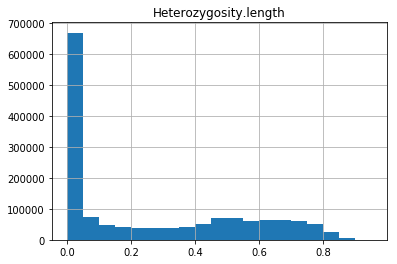

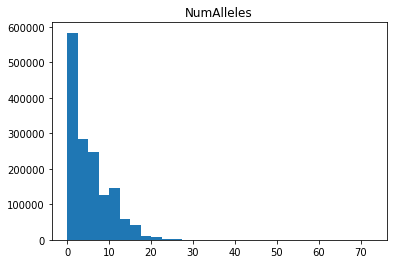

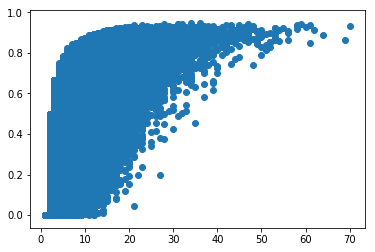

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bin_values1 = np.arange(start=0, stop=75, step=2.5)
bin_values2 = np.arange(start=0, stop=1, step=0.05)

ZY = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Heterozygosity/Heterozygosity.table', sep='\t')
ZY.hist(column='Heterozygosity.length', bins=bin_values2, grid=True)
plt.show()
ZY.hist(column='NumAlleles', bins=bin_values1, grid=False)
plt .show()
#plt.scatter(df.preTestScore, df.postTestScore, s=300, c=df.female)
plt.scatter(ZY['NumAlleles'],ZY['Heterozygosity.length'])
plt.show()


In [21]:
ZY

,CHROM,POS,END,NumAlleleLenghts,NumAlleles,Heterozygosity.length,Heterozygosity.genotype
0,chr1,16717,16744,2,4,0.455000,0.574259
1,chr1,26454,26465,1,3,0.000000,0.551154
2,chr1,28587,28603,10,13,0.836911,0.841375
3,chr1,30859,30959,6,8,0.552124,0.668274
4,chr1,31720,31733,4,4,0.506941,0.506941
5,chr1,33445,33464,7,10,0.695632,0.712799
6,chr1,33517,33541,4,5,0.267616,0.625120
7,chr1,35484,35507,2,3,0.068407,0.460238
8,chr1,36352,36364,2,3,0.066342,0.472263
9,chr1,39909,39923,1,1,0.000000,0.000000
